In [193]:
import pandas as pd
import numpy as np
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split,cross_val_score
import warnings
warnings.filterwarnings("ignore")
from scipy.stats import randint
from sklearn.tree import export_graphviz   
from IPython.display import Image                            
import graphviz          

In [194]:
data = pd.read_csv(r"C:\Users\vinay\OneDrive\Desktop\Christ\SEM2\MACHINE LEARNING\cleaned.csv")

In [195]:
data.head(10)

,Unnamed: 0,Rooms,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude
0,0,2,1480000.0,2.5,2,1,1,202.0,79.0,1900,-37.7996,144.9984
1,1,2,1035000.0,2.5,2,1,0,156.0,79.0,1900,-37.8079,144.9934
2,2,3,1465000.0,2.5,3,2,0,134.0,150.0,1900,-37.8093,144.9944
3,3,3,850000.0,2.5,3,2,1,94.0,142.0,2014,-37.7969,144.9969
4,4,4,1600000.0,2.5,3,1,2,120.0,142.0,2014,-37.8072,144.9941
5,5,2,941000.0,2.5,2,1,0,181.0,210.0,1910,-37.8041,144.9953
6,6,3,1876000.0,2.5,4,2,0,245.0,210.0,1910,-37.8024,144.9993
7,7,2,1636000.0,2.5,2,1,2,256.0,107.0,1890,-37.8060,144.9954
8,8,1,300000.0,2.5,1,1,1,0.0,75.0,1900,-37.8008,144.9973
9,9,2,1097000.0,2.5,3,1,2,220.0,75.0,1900,-37.8010,144.9989


In [196]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13518 entries, 0 to 13517
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    13518 non-null  int64  
 1   Rooms         13518 non-null  int64  
 2   Price         13518 non-null  float64
 3   Distance      13518 non-null  float64
 4   Bedroom2      13518 non-null  int64  
 5   Bathroom      13518 non-null  int64  
 6   Car           13518 non-null  int64  
 7   Landsize      13518 non-null  float64
 8   BuildingArea  13518 non-null  float64
 9   YearBuilt     13518 non-null  int64  
 10  Lattitude     13518 non-null  float64
 11  Longtitude    13518 non-null  float64
dtypes: float64(6), int64(6)
memory usage: 1.2 MB


In [197]:
price = data["Price"]
price = price.to_numpy().reshape(-1,1)
price

array([[1480000.],
       [1035000.],
       [1465000.],
       ...,
       [1170000.],
       [2500000.],
       [1285000.]])

In [198]:
drop = ['Unnamed: 0','Price']

In [199]:
x = data.drop(drop,axis=1)
y = price
X_train, X_test, y_train, y_test = train_test_split(x,y , random_state=104, test_size=0.5, shuffle=True)

In [200]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
y_train = sc.fit_transform(y_train)
y_test = sc.transform(y_test)

# Boosting

### 1. XG BOOST

In [201]:
xgr = XGBRegressor(n_estimators=500,learning_rate = 0.05)
xgr.fit(X_train, y_train,  early_stopping_rounds=5, eval_set=[(X_test, y_test)],verbose=False)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=500, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [202]:
score = xgr.score(X_train, y_train)  
print("Training score: ", score)
from sklearn.metrics import mean_squared_error
predictions = xgr.predict(X_test)

Training score:  0.9342445074539417


In [203]:
test_score = xgr.score(X_test,y_test)
test_score

0.7875798397007324

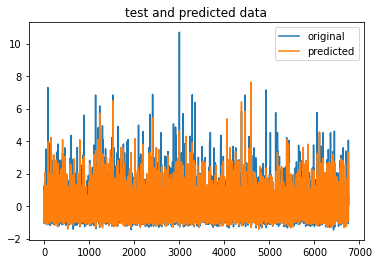

In [204]:
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, predictions, label="predicted")
plt.title("test and predicted data")
plt.legend()
plt.show()

### 2. ADA BOOST REGRESSOR

In [205]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor

In [206]:
DTR=DecisionTreeRegressor(max_depth=1)
ADA_reg = AdaBoostRegressor(n_estimators=50, base_estimator=DTR ,learning_rate=1)
ADA_reg

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=1),
                  learning_rate=1)

In [207]:
AB=ADA_reg.fit(X_train,y_train)
print("Training Score :",AB.score(X_train,y_train))


Training Score : 0.1687602932444775


In [208]:
prediction_AB=AB.predict(X_test)
print("Test score :",AB.score(X_test,y_test))

Test score : 0.15966208464575604


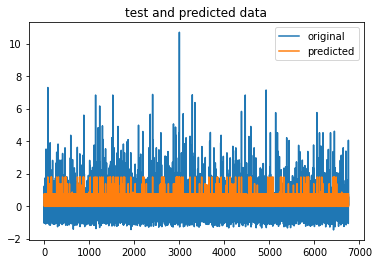

In [209]:
x_ada = range(len(y_test))
plt.plot(x_ada, y_test, label="original")
plt.plot(x_ada, prediction_AB, label="predicted")
plt.title("test and predicted data")
plt.legend()
plt.show()

# Bagging

In [210]:
from sklearn.ensemble import RandomForestRegressor

In [211]:
rf = RandomForestRegressor(n_estimators = 100,random_state = 0)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [212]:
accuracy_train = rf.score(X_train,y_train)
print("Test score of the model:", accuracy_train) 

Test score of the model: 0.9665909562885018


In [213]:
accuracy = rf.score(X_test,y_test)
print("Test score of the model:", accuracy) 

Test score of the model: 0.7697800891380873


### Hyperparameter Tuning

In [214]:
from sklearn.model_selection import RandomizedSearchCV
param_dist = {'n_estimators': np.arange(5, 50, 10),'max_depth': randint(1,20).rvs(5)}
rf = RandomForestRegressor()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf, param_distributions = param_dist, n_iter=5, cv=5)

In [215]:
rand_search.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=5,
                   param_distributions={'max_depth': array([ 5,  2, 10, 15, 19], dtype=int64),
                                        'n_estimators': array([ 5, 15, 25, 35, 45])})

In [216]:
print("Training score after hypertuning :",rand_search.score(X_train,y_train))
print("Testing score after hypertuning :",rand_search.score(X_test,y_test))

Training score after hypertuning : 0.9616139207260276
Testing score after hypertuning : 0.7702300560181227


In [217]:
# Create a variable for the best model
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'n_estimators': 45, 'max_depth': 19}


In [218]:
# Create a series containing feature importances from the model and feature names from the training data
feature_importances = pd.Series(best_rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Plot a simple bar chart
feature_importances.plot.bar();

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

### CONCLUSION
#### ADA boost score :16.3% <br>
#### XG Boost : 78.71% <br>
#### RandomforestRegressor : 77.01